In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [56]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [57]:
len(x_train)

60000

In [58]:
len(x_test)

10000

In [59]:
# What we are doing here is called scaling. It is used to improve the accuracy of ml models. Each value in our array ranges between 0 to 255. 
# So we are dividing the whole array by 255.
x_train = x_train/255
x_test = x_test/255

In [60]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

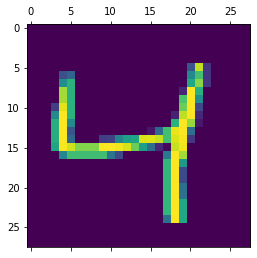

In [61]:
plt.matshow(x_train[2])

FLATTEN THE TRAINING DATASET FRO 28 BY 28 IMAGE INTO A SINGLE DIMENSIONAL ARRAY

In [62]:
#Why do need to flatten it?
#We want to convert the 28 by 28 image into a 1D array that would have 784 elements: 
# So we have to flatten it to get that. This ca be achieved using a function called reshape() in numpy library.

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [63]:
x_test_flattened.shape

(10000, 784)

In [64]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [65]:
# Create a simple neural network (a neural network with only input and output layers)
# why do we need to use a simple neural network?
# We use sequential from keras because we have a stack of layers in our neural network.
# Since it is a stack, it will accept every layer as one element and the first element here is input.
model = keras.Sequential([
    # Create a dense layer (dense means all the neurons are fully connected to each other) and assign activatio function
    keras.layers.Dense(10, input_shape=(784,), activation ='sigmoid')
    
])


# After creating our neural network we stored it in a variable called model. We need to compile it. 
# In tensorflow and keras compiling is something you have to do all the time . It is like initializing the model.
# We are going to that by passing these bunch of arguments into the compile function.

# OPTIMIZER: This is the algorithm that is going to be used to update the weights of the model. Optimizers helps you to train your model efficiently.
# When the backward progation and the training is going on, the optimizer allow you to reach to global optima in efficient way.
# In this case, we are using Adam optimizer, Adam is a type of stochastic gradient descent. It is a popular optimizer.

# LOSS FUNCTION: This is the function that is going to be used to calculate the difference between the actual output and the
# In this case, we are going to use sparse categorical cross entropy loss function. This is a type of loss function that is used
# when the output is a probability distribution over multiple classes. This is because our output class a categorical: We have like 10 classes in our output layer(0to9).
# Sparse means that output (which is y train) is actaully an integer:is not one-hot encoded. It is just a single number that represents the class index.
# If it is one-hot encoded then it would be a vector of 10 elements where all the elements are 0 and in such case you would be using a categorical cross entropy loss function.
# Categorical cross entropy loss function is used when the output is a probability distribution over multiple classes.


# METRICS: This is the function that is going to be used to calculate the performance of the model. In this case, we are using accuracy as the metric because we are doing a classification problem.


model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )



# We have compiled our neural network now we can go ahead and train it. We are going to use the fit function to train our model.
# The fit function is used to train the model on the training data. It takes in the training data and the number of epochs as arguments.
# The number of epochs is the number of times the model sees the training data. The more the number of epochs the more the model sees the training data and the better it gets.
# In this case, we are going to train the model for 5 epochs. The ideal number of epochs is the number of epochs that gives the best performance on the validation data. 
# You can determine if the number of epoch gives the best performance on the validation data by looking at the validation accuracy. If the validation accuracy is increasing  
# then the number of epochs is good. If the validation accuracy is decreasing then the number of epochs is too high. 
# You can also use early stopping to stop the training when the validation accuracy is not increasing.
model.fit(x_train_flattened, y_train, epochs=5)

# As the time goes above, the accuracy should be increasing. If it is not, then you need to scale your data. Each of the values is in range o to 255, so you can scale it to 0 to 1 by dividing by 255.0.
# The accuracy should be increasing as the time goes above.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4697 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9258


In [66]:


# If the accuracy is not then you need to adjust the parameters of the model. You can use the following code to plot the accuracy of the model over time
# Let's evaluate the accuracy on a test dataset
#from sklearn.model_selection import train_test_split 
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import learning_curve
#from sklearn.model_selection import ShuffleSplit


# During training, the model is actually running on the training data. The model is trying to learn the relationship between the input features and the target variable. 
# The model is trying to minimize the loss function, which is the difference between the predicted output and the actual output. 
# But before deploying model to production, we always evaluate the accuracy on a test dataset. 
# Let's evaluate our model:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9248


[0.2688522934913635, 0.9247999787330627]

In [69]:
# Let's do a sample prediction
y_predict = model.predict(x_test_flattened)





313/313 [==============================] - 0s 935us/step


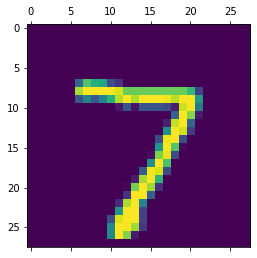

In [ ]:
# The above predicted all the sample images. Let's predict only the first image.

plt.matshow(x_test[0])

# Why can't I predict on x_test_flattened?

In [74]:
y_predict[0]

array([2.1360453e-02, 3.4756479e-07, 9.1098152e-02, 9.4858164e-01,
       2.6990974e-03, 1.2001571e-01, 2.3514704e-06, 9.9988049e-01,
       9.9500135e-02, 7.0343679e-01], dtype=float32)

In [77]:
# From the prediction of the first value above, you would notice that the prediction has 10 values because it is still printing those values we ealier flattened. 
# So we can use th numpy `argmax` function to get the index of the maximum value in the prediction. This will give us the index of the class with the highest probability.

# Let's use the `argmax` function to get the index of the class with the highest probability.
np.argmax(y_predicted[0])

7

In [90]:
# Let's look at how our prediction look like using the confusion matrix.
# Confusion matrix needs the real labels of the y_predicted(7,2..) and the y_test. The y_test is an int value but if you recall, we have whole values in our y_predicted (2.1360453e-02..).
# So we need to convert the float values in y_predicted to the actual class labels. We can do this by using the np.argmax function.
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Now we can create the confusion matrix using the y_test and y_predicted_labels.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm



<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    2,    0,    3,    3,    2,    2],
       [   0, 1123,    3,    2,    0,    0,    2,    0,    5,    0],
       [   2,    1, 1001,    4,    5,    0,    5,   11,    3,    0],
       [   0,    0,    3,  983,    1,    2,    0,    5,    8,    8],
       [   0,    0,    4,    1,  961,    0,    4,    1,    0,   11],
       [   2,    0,    1,   13,    1,  861,    6,    0,    6,    2],
       [   5,    3,    1,    1,    4,    2,  939,    1,    2,    0],
       [   0,    2,    7,    3,    4,    0,    0,  999,    2,   11],
       [   1,    1,    4,    7,    9,    1,    3,    5,  938,    5],
       [   1,    2,    0,    7,   14,    0,    0,    6,    2,  977]])>

Text(69.0, 0.5, 'Actual')

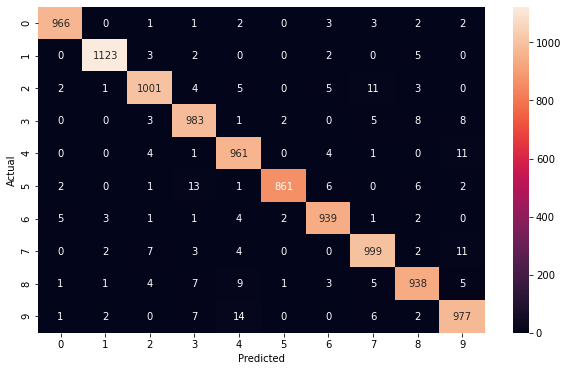

In [91]:
# Let's use seaborn library to  see the confusion matrix:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

IMPROVING THE MODEL TO SEE IF WE CAN GET AN ACCURACY OF MORE THAN 97%

In [96]:
# Let's add a hidden layer to our model to improve its performance. We'll use the ReLU activation function for this layer.

# Add a hidden layer and evaluate
model = keras.Sequential([
    #ALSO TRY SOME MORE HIDDEN LAYERS AS WELL. ALSO TRY TO PLAY WITH DIFFERENT ACTIVATION FUNCTIONS AND IF YOU CAN IMPROVE THE ACCURACY OF THE MODEL
    keras.layers.Dense(100, input_shape=(784,), activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2883 - accuracy: 0.9172
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1289 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0896 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9832


In [ ]:
# Let's evaluate the accuracy on a test dataset
model.evaluate(x_test_flattened, y_test)

# Comapre the accuracy of the model with the accuracy of the model with only input and output layers. 
# You would notice the accuracy is now higher because we added the hidden layer.


313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9765


[0.07692977786064148, 0.9764999747276306]

Text(69.0, 0.5, 'Actual')

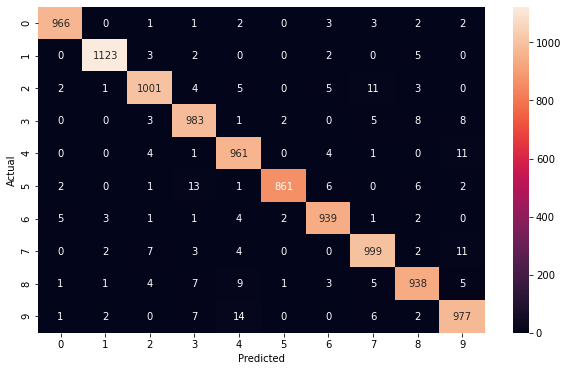

In [100]:
# Let's also see the confusion matrix and compare it with the previous one:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# You would notice the number of errors (numbers in the black boxes have decreased) and the accuracy (number in the colored boxes) has increased. This is because the model has learned from the new data and is now. 
# In a perfect state you will have a confusion matrix like this:
# [[0 0 0] i.e ., all the numbers in the black boxes are 0. This means the model is 100%. But this can hardly happen in real life.

In [102]:
# Normally whenever you are building a neural network model you have to make flatten array. 
# But in Keras you don't need to do that because Keras has a function called dense layer which can handle the input data automatically.
# So you don't need to make flatten array in Keras. But if you are using other libraries like TensorFlow or PyTorch you have to make flatten array manually.
# So in this example we are using Keras library so we don't need to make flatten array manually. We can directly use the input data in the model. 
# So the input shape of the model is (28, 28) which is the size of the input data. 

model = keras.Sequential([
    #ALSO TRY SOME MORE HIDDEN LAYERS AS WELL. ALSO TRY TO PLAY WITH DIFFERENT ACTIVATION FUNCTIONS AND IF YOU CAN IMPROVE THE ACCURACY OF THE MODEL
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2721 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1246 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9839


In [ ]:
# ADD MORE HIDDEN LAYERS


In [ ]:
# TRY DIFFERENT OPTIMIZERS FROM KERAS OR TENSORFLOW DOCUMENTATION
# THE WEB ADDRESS: https://keras.io/optimizers/



In [ ]:
# TRY DIFFERENT LOSS FUNCTIONS FROM KERAS OR TENSORFLOW DOCUMENTATION.
# THE WEB ADDRESS: https://keras.io/losses/




In [ ]:
# USE DIFFERENT VALUES OF EPOCHS

